<a href="https://colab.research.google.com/github/jegadeesh2001/Twitter_sentiment_analysis/blob/master/19pd14_and_19pd15(ML_Package).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                    **TWITTER SENTIMENT ANALYSIS**


> **TEAM MEMBERS:**

> 1. R.Jeeva(19PD14)


> 2. M.S.Jegadeesh Manickam(19PD15)








In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **IMPORTING LIBRARIES**

In [ ]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **DATASET**

In [ ]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/content/gdrive/MyDrive/tweets.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
156346,0,1956091564,Thu May 28 21:10:20 PDT 2009,NO_QUERY,rytchardr,Jay Leno leaving soon ... not a fan of his rep...
1266217,4,1999609196,Mon Jun 01 20:30:55 PDT 2009,NO_QUERY,OriginalNajeema,@planethealer Glad to share that moment with y...
1182487,4,1982263760,Sun May 31 10:51:34 PDT 2009,NO_QUERY,LeahRiddell,Swimming at the rock quarry today. woohoo !
1039803,4,1956861947,Thu May 28 22:52:54 PDT 2009,NO_QUERY,RGM77,"Owwwwwwwwwwwwww fffuuu,,,SHARP -gmpphhh dr. Q..."
160625,0,1957112874,Thu May 28 23:33:13 PDT 2009,NO_QUERY,VivaLaLaurennn,Holy crap! It's raining in LA and I don't have...


In [ ]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [ ]:
print('length of data is', len(df))

length of data is 1600000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
df. shape

(1600000, 6)

In [ ]:
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

# **EDA**

##**Users that Tweet Frequently**

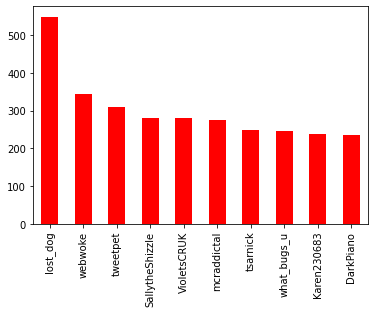

In [ ]:
users = df['user'].value_counts()[:10]
users.plot(kind='bar', color='red')

##**Distribution of Positive and Negative Tweets**

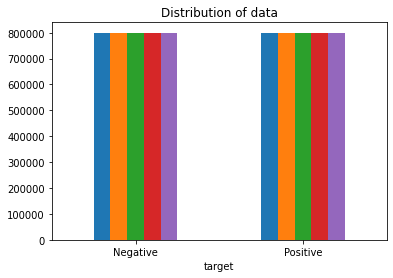

In [ ]:
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

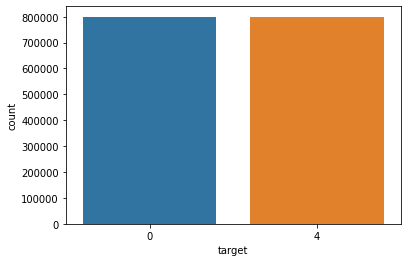

In [ ]:
import seaborn as sns
sns.countplot(x='target', data=df)

In [ ]:
data=df[['text','target']]

In [ ]:
data['target'] = data['target'].replace(4,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


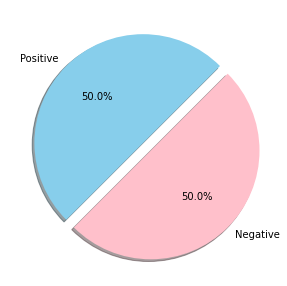

In [ ]:
fig=plt.figure(figsize=(5,5))
colors=["skyblue",'pink']
pos=data[df['target']==4]
neg=data[data['target']==0]
ck=[pos['target'].count(),neg['target'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

##**Count of words in the tweet**

In [ ]:
corpus = []

word = df['text'].str.split()
new = word.values.tolist()
corpus=[word for i in new for word in i]

In [ ]:
stop_words = set(stopwords.words('english'))

<BarContainer object of 14 artists>

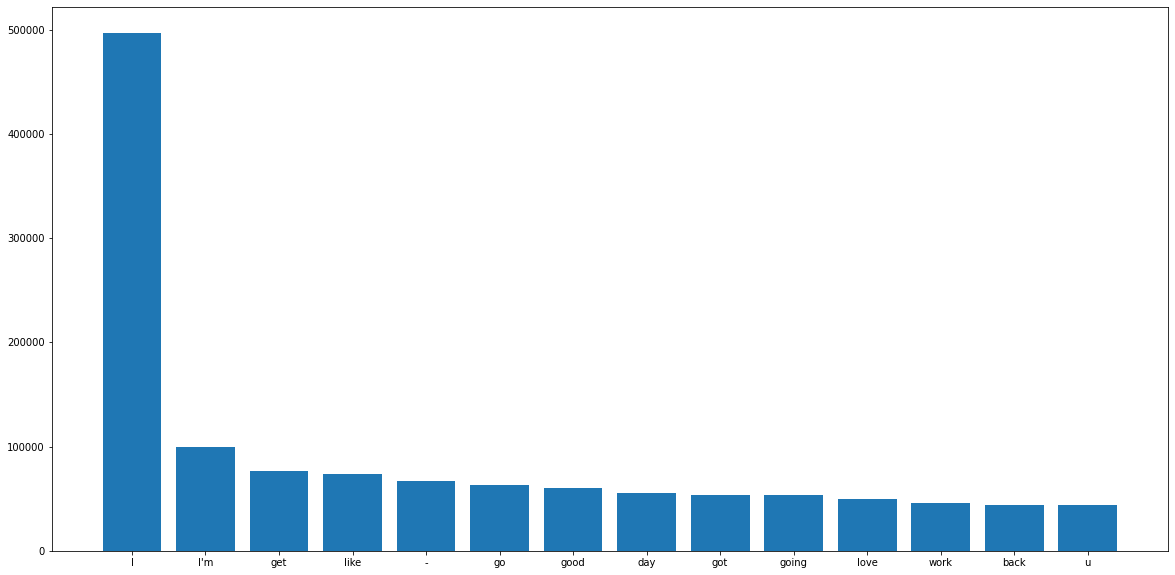

In [ ]:
from collections import Counter

counter=Counter(corpus)
most=counter.most_common(100)

x, y= [], []
for word,count in most[:50]:
    # can avoid stop words too
    if word not in stop_words:
        x.append(word)
        y.append(count)
plt.rcParams["figure.figsize"] = (20, 10)       
plt.bar(x,y)

##**Top 20 Frequently occuring words in Tweet**

In [ ]:
import plotly.express as px

temp = pd.DataFrame.from_records(list(dict(most).items()), columns=['word','count'])
temp1=temp.iloc[:20]
fig = px.pie(temp1,names=temp1["word"] ,values=temp1["count"],title="WORDS IN TWEET")
fig.show()

##**Length of Tweets**

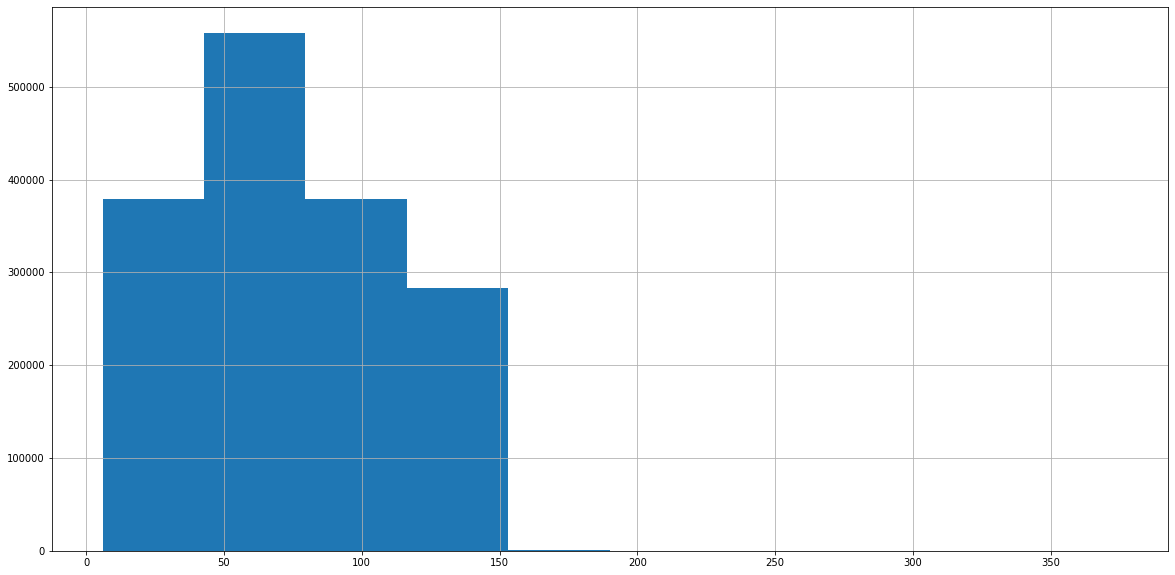

In [ ]:
df['text'].str.len().hist()

In [ ]:
data['target'].unique()

array([0, 1])

In [ ]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

##**Count of words in positive tweets**

In [ ]:
corpuspos = []

wordpos = data_pos['text'].str.split()
newpos = wordpos.values.tolist()
corpuspos=[wordpos for i in newpos for wordpos in i]

<BarContainer object of 14 artists>

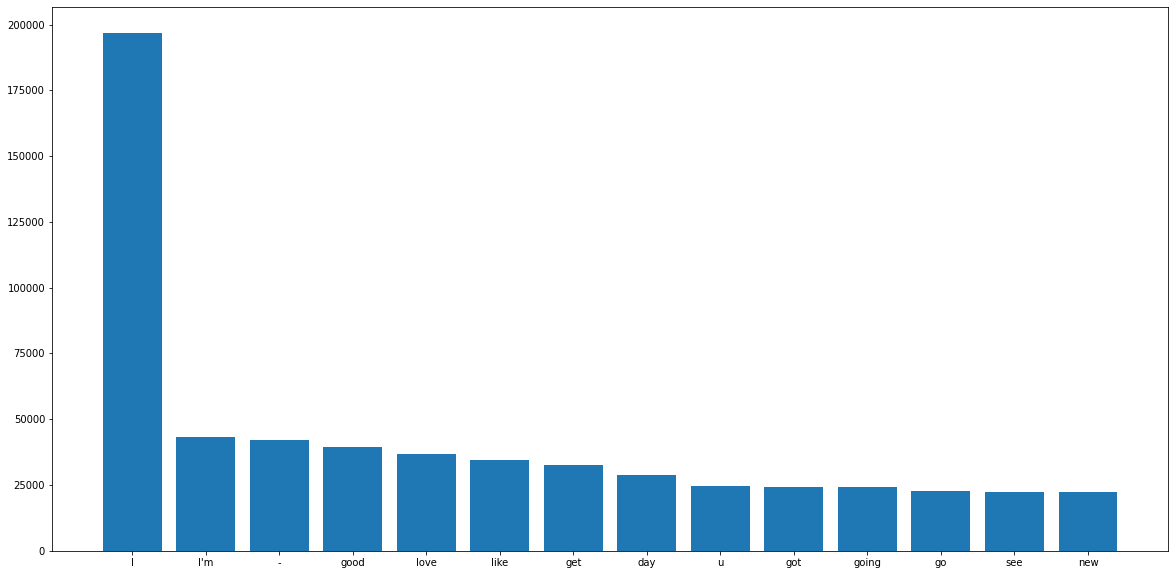

In [ ]:
from collections import Counter

counter=Counter(corpuspos)
mostpos=counter.most_common(100)

x, y= [], []
for wordpos,countpos in mostpos[:50]:
    # can avoid stop words too
    if wordpos not in stop_words:
        x.append(wordpos)
        y.append(countpos)
plt.rcParams["figure.figsize"] = (20, 10)       
plt.bar(x,y)

In [ ]:
temppos = pd.DataFrame.from_records(list(dict(mostpos).items()), columns=['Positiveword','count'])
temppos.head()

,Positiveword,count
0,the,246501
1,to,246444
2,I,196797
3,a,190388
4,you,138383


##**Top 20 frequent words in positive tweet**

In [ ]:
temppos1=temppos.iloc[:20]
fig = px.pie(temppos1,names=temppos1["Positiveword"] ,values=temppos1["count"],title="WORDS IN POSITIVE TWEET")
fig.show()

##**Words in Negative Tweet**

In [ ]:
corpusneg = []

wordneg = data_neg['text'].str.split()
newneg = wordneg.values.tolist()
corpusneg=[wordneg for i in newneg for wordneg in i]

<BarContainer object of 15 artists>

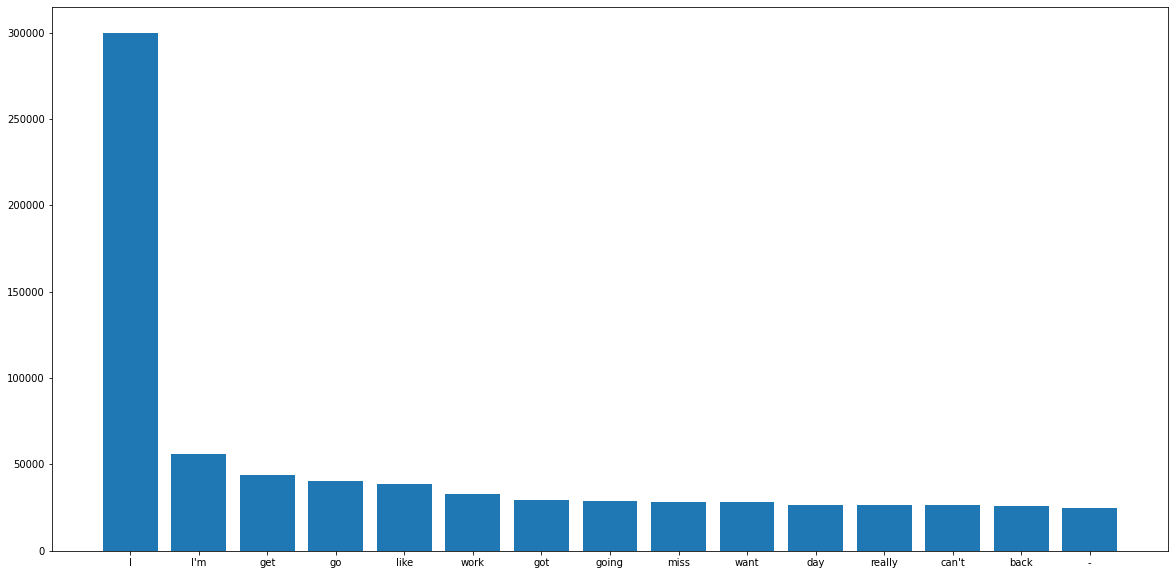

In [ ]:
from collections import Counter

counter=Counter(corpusneg)
mostneg=counter.most_common(100)

x, y= [], []
for wordneg,countneg in mostneg[:50]:
    # can avoid stop words too
    if wordneg not in stop_words:
        x.append(wordneg)
        y.append(countneg)
plt.rcParams["figure.figsize"] = (20, 10)       
plt.bar(x,y)

In [ ]:
tempneg = pd.DataFrame.from_records(list(dict(mostneg).items()), columns=['Negativeword','count'])
tempneg.head()

,Negativeword,count
0,to,306518
1,I,299822
2,the,241000
3,a,175824
4,my,166917


##**Top 20 words in negative tweet**

In [ ]:
tempneg1=tempneg.iloc[:20]
fig = px.pie(tempneg1,names=tempneg1["Negativeword"] ,values=tempneg1["count"],title="WORDS IN NEGATIVE TWEET")
fig.show()

##**WordCloud**

**For Positive Tweets:**

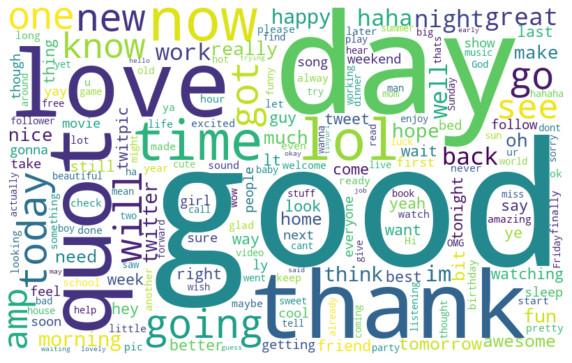

In [ ]:
from wordcloud import WordCloud


all_words = ' '.join([text for text in data_pos.text])

wordcloud = WordCloud(width= 800, height= 500,background_color = 'white',collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**For Negative tweets:**

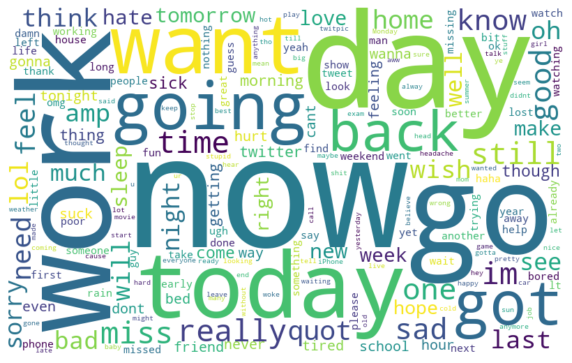

In [ ]:
from wordcloud import WordCloud


all_words = ' '.join([text for text in data_neg.text])

wordcloud = WordCloud(width= 800, height= 500,background_color = 'white',collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
data_pos = data_pos.iloc[:int(200000)]
data_neg = data_neg.iloc[:int(200000)]

In [ ]:
dataset = pd.concat([data_pos, data_neg])

# **TEXT PRE-PROCESSING**

##**Converting Text to Lowercase**

In [ ]:
data['text']=data['text'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0
1,is upset that he can't update his facebook by ...,0
2,@kenichan i dived many times for the ball. man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


##**Removing punctuations from Text**

In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1599995    just woke up having no school is the best feel...
1599996    thewdbcom  very cool to hear old walt intervie...
1599997    are you ready for your mojo makeover ask me fo...
1599998    happy 38th birthday to my boo of alll time tup...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

##**Removing repeating characters from Text**

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'].tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1599995    just woke up having no school is the best feel...
1599996    thewdbcom  very cool to hear old walt intervie...
1599997    are you ready for your mojo makeover ask me fo...
1599998    happy 38th birthday to my boo of alll time tup...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

##**Removing URL's from Text**

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1599995    just woke up having no school is the best feel...
1599996    thewdbcom  very cool to hear old walt intervie...
1599997    are you ready for your mojo makeover ask me fo...
1599998    happy 38th birthday to my boo of alll time tup...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

##**Removing numbers from Text**

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1599995    just woke up having no school is the best feel...
1599996    thewdbcom  very cool to hear old walt intervie...
1599997    are you ready for your mojo makeover ask me fo...
1599998    happy th birthday to my boo of alll time tupac...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

##**Removing Stopwords from text**

In [ ]:
from nltk.tokenize import word_tokenize


def remove_stopWords(s):
    '''For removing stop words
    '''
    s = ' '.join(word for word in s.split() if word not in stop_words)
    return s

data.loc[:,"text"] = data.text.apply(lambda x: remove_stopWords(x))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##**Reducing words to their root-form using PorterStemmer**

In [ ]:
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
porter = PorterStemmer()
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)
data.loc[:,"text"] = data.text.apply(lambda x: stemSentence(x))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data.head()

,text,target
0,switchfoot httptwitpiccomzl bummer shoulda got...,0
1,upset cant updat facebook text might cri resul...,0
2,kenichan dive mani time ball manag save rest g...,0
3,whole bodi feel itchi like fire,0
4,nationwideclass behav im mad cant see,0


##**Train-Test Split**

In [ ]:
X=data.text
y=data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =42)

##**Converting words to Features using Tf-Idf Vectorizer**

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2),max_features=500000)
vectoriser.fit(X_train,)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



No. of feature_words:  500000


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

##**K-Means Clustering**

In [ ]:
from sklearn.cluster import MiniBatchKMeans

In [ ]:
X1=X.copy()
X1 = vectoriser.fit_transform(X1)


In [ ]:
random_state = 0 
kmeans_model = MiniBatchKMeans(n_clusters=2, random_state=random_state)
kmeans_model.fit(X1)

MiniBatchKMeans(n_clusters=2, random_state=0)

In [ ]:
kmeans_model.predict(X1)
kmeans_model.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
clusters=kmeans_model.labels_.tolist()

In [ ]:
tweets = {'Tweet': data["text"].tolist(), 'Cluster': clusters}
frame = pd.DataFrame(tweets, index = [clusters])
frame

,Tweet,Cluster
0,switchfoot httptwitpiccomzl bummer shoulda got...,0
0,upset cant updat facebook text might cri resul...,0
0,kenichan dive mani time ball manag save rest g...,0
1,whole bodi feel itchi like fire,1
0,nationwideclass behav im mad cant see,0
...,...,...
1,woke school best feel ever,1
0,thewdbcom cool hear old walt interview â « ht...,0
0,readi mojo makeov ask detail,0
0,happi th birthday boo alll time tupac amaru sh...,0


In [ ]:
print ('Most Common Terms per Cluster:')

order_centroids = kmeans_model.cluster_centers_.argsort()[:,::-1] #sort cluster centers by proximity to centroid
terms = vectoriser.get_feature_names()

for i in range(2):
    print("\n")
    print('Cluster %d:' % i)
    for j in order_centroids[i, :10]: #replace 10 with n words per cluster
        print ('%s' % terms[j]),
    

Most Common Terms per Cluster:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.





Cluster 0:
im
go
day
work
get
good
thank
love
miss
got


Cluster 1:
feel
na
gon
gon na
wan
wan na
like
feel like
im
dont


In [ ]:
print("--------------Predicting to which Cluster the given tweet belongs to---------------")
inp="Awww, that's a bummer You shoulda got David Carr of Third Day to do it"
inpt = vectoriser.transform([inp])
prediction = kmeans_model.predict(inpt)
print("Cluster-> ",prediction)



--------------Predicting to which Cluster the given tweet belongs to---------------
Cluster->  [0]


##**Evaluating Supervised-Learning Models**

In [ ]:
def model_Evaluate(model):

      y_pred = model.predict(X_test)
      print(classification_report(y_test, y_pred))
      cf_matrix = confusion_matrix(y_test, y_pred)
      categories = ['Negative','Positive']
      group_names = ['True Neg','False Pos', 'False Neg','True Pos']
      group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
      labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
      labels = np.asarray(labels).reshape(2,2)
      sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
      xticklabels = categories, yticklabels = categories)
      plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
      plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
      plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
X_train

<1520000x500000 sparse matrix of type '<class 'numpy.float64'>'
	with 16280485 stored elements in Compressed Sparse Row format>

In [ ]:
y_train

504328     0
196809     0
187559     0
646526     0
1428077    1
          ..
259178     0
1414414    1
131932     0
671155     0
121958     0
Name: target, Length: 1520000, dtype: int64

# **CLASSIFICATION MODELS**

##**NAIVE-BAYES**

              precision    recall  f1-score   support

           0       0.80      0.76      0.78     39999
           1       0.77      0.81      0.79     40001

    accuracy                           0.79     80000
   macro avg       0.79      0.79      0.78     80000
weighted avg       0.79      0.79      0.78     80000



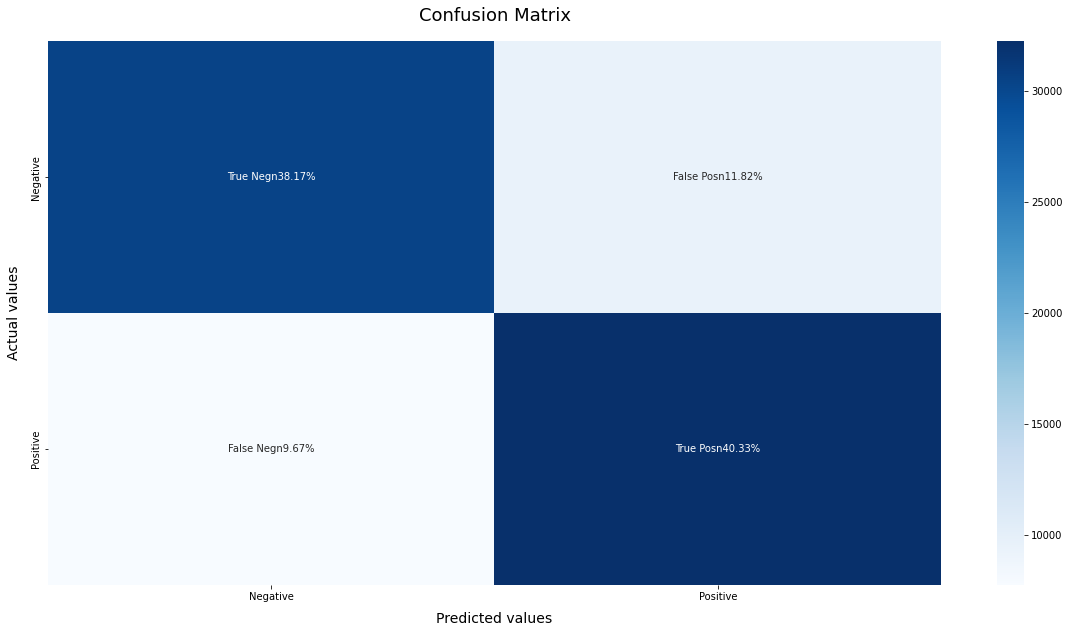

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

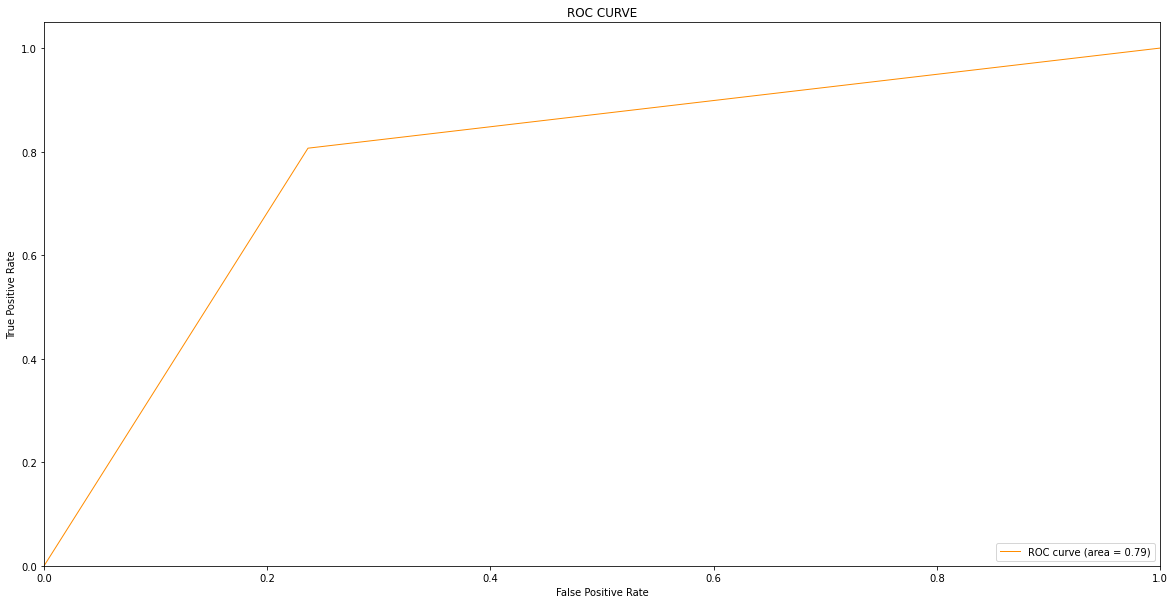

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

##**SVM**

In [ ]:
from sklearn.svm import SVC

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     39999
           1       0.78      0.80      0.79     40001

    accuracy                           0.79     80000
   macro avg       0.79      0.79      0.79     80000
weighted avg       0.79      0.79      0.79     80000



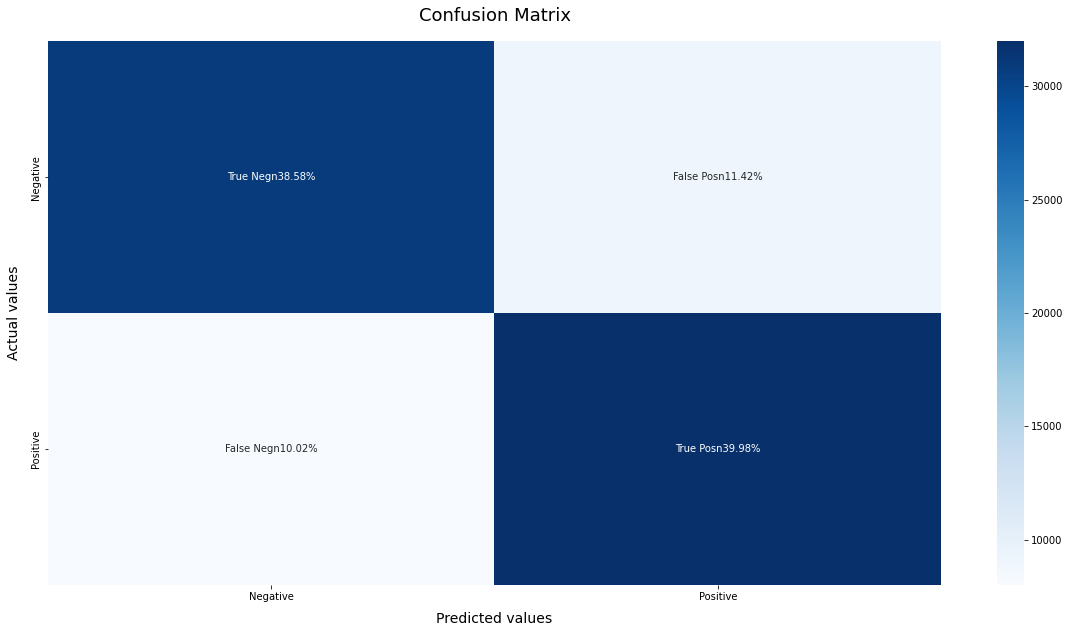

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

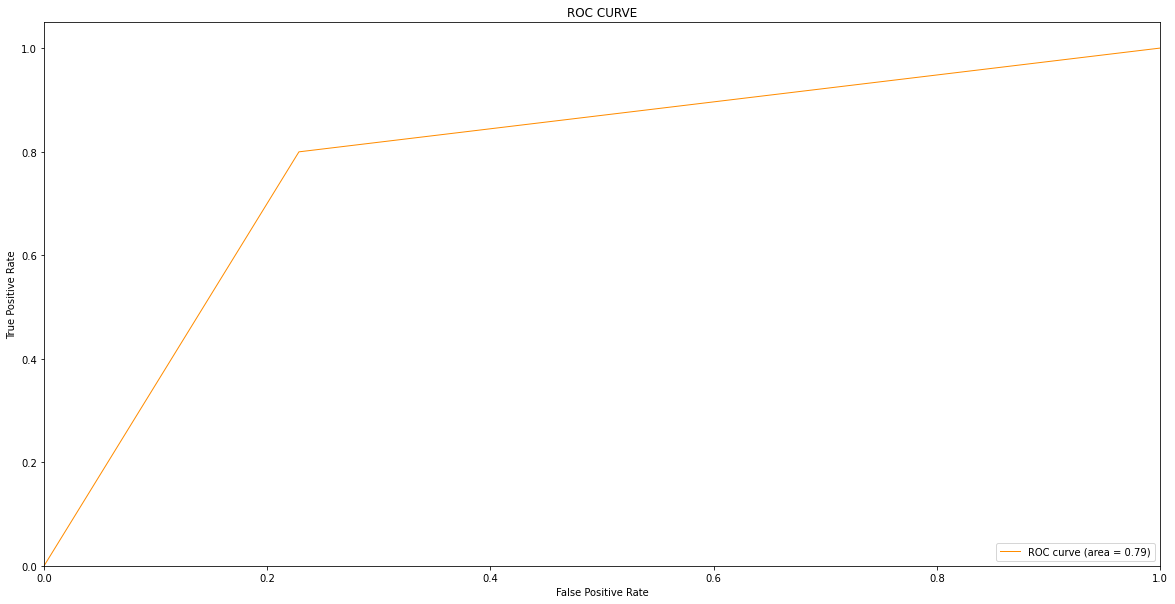

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

##**LOGISTIC REGRESSION**

              precision    recall  f1-score   support

           0       0.81      0.78      0.80     39999
           1       0.79      0.82      0.80     40001

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



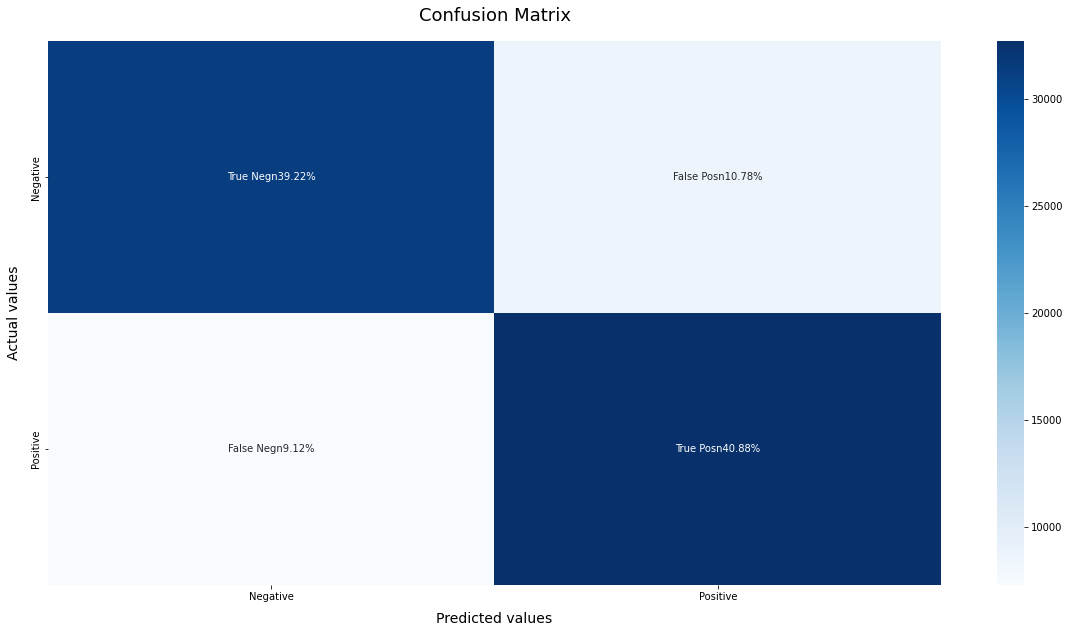

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)


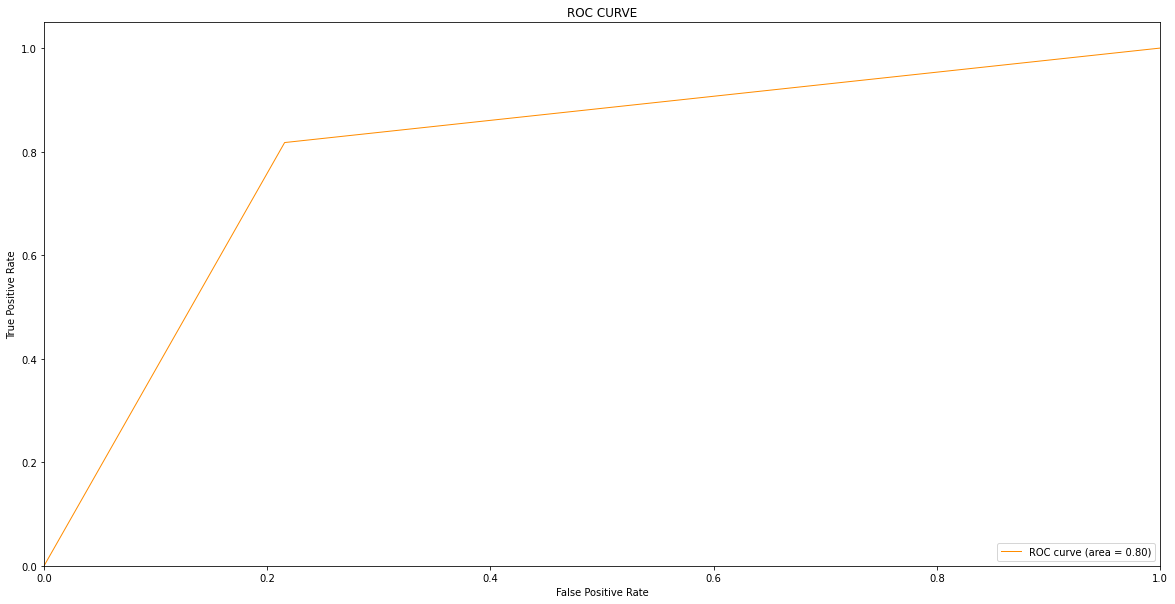

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

##**Perceptron**

In [ ]:
from sklearn.linear_model import Perceptron

              precision    recall  f1-score   support

           0       0.73      0.72      0.73     39999
           1       0.73      0.74      0.73     40001

    accuracy                           0.73     80000
   macro avg       0.73      0.73      0.73     80000
weighted avg       0.73      0.73      0.73     80000



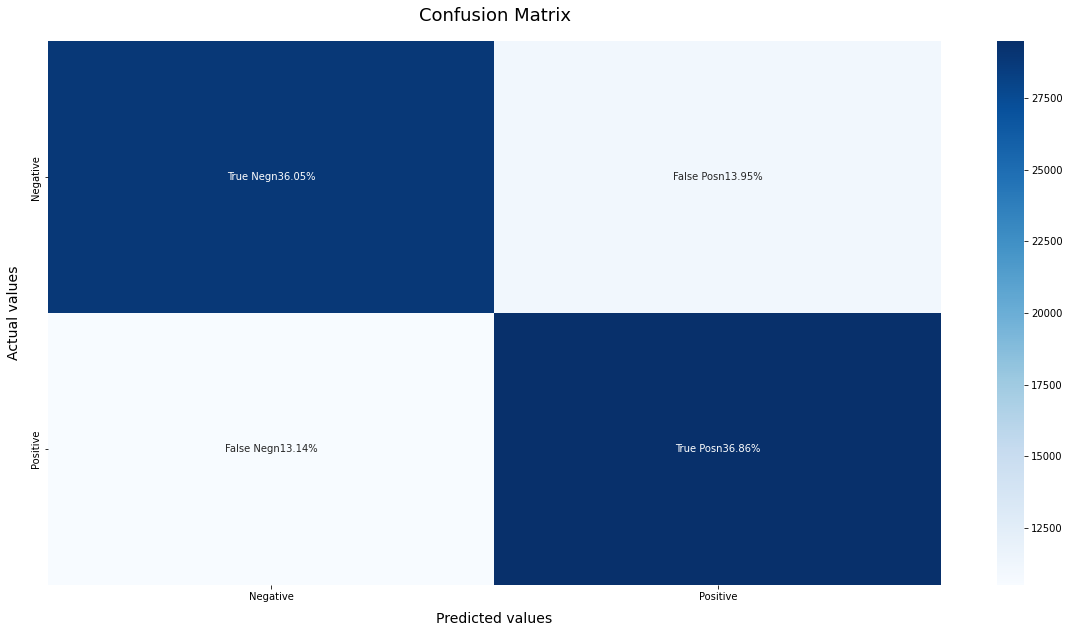

In [ ]:
Percp = Perceptron(random_state=0)
Percp.fit(X_train, y_train)
model_Evaluate(Percp)
y_pred4 = Percp.predict(X_test)

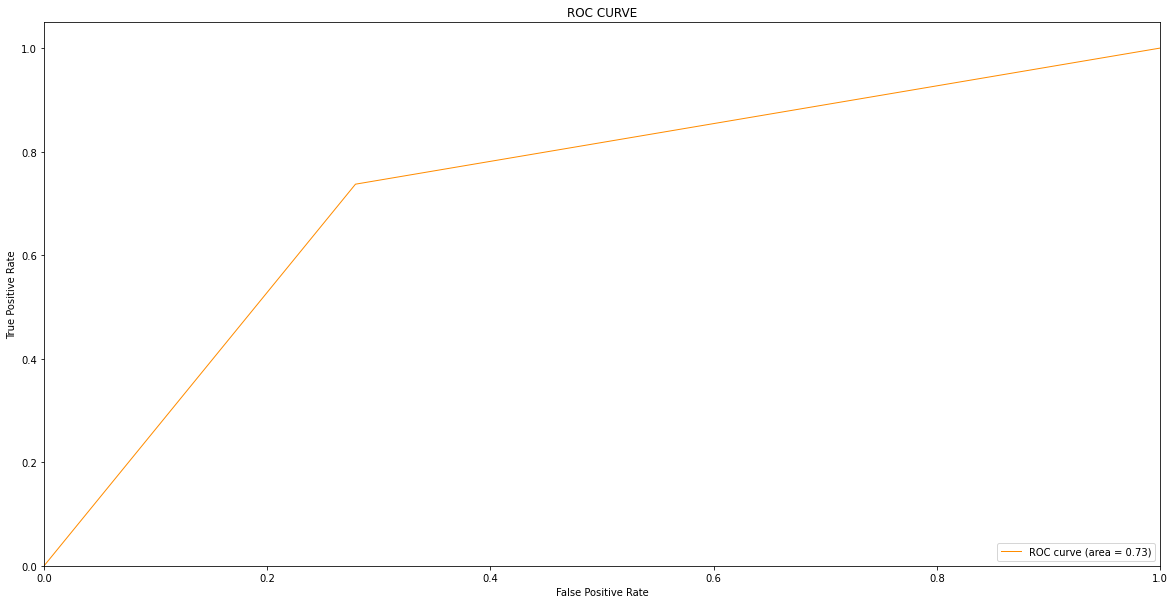

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred4)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# **Prediction of Tweet from the User**

In [ ]:
import pickle
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(LRmodel, pickle_out) 
pickle_out.close()

In [ ]:
import pickle
pickle_out = open("vect.pkl", mode = "wb") 
pickle.dump(vectoriser, pickle_out) 

**We have deployed the model locally using Streamlit**